IMPORTING IMPORTANT PYTHON LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

LOADING OF DATASET

In [2]:
df=pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")
df.head(15)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,14.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,204.0,2.0,430.0,2019-06-24,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,58.0,2.0,118.0,2017-07-21,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN


### Display Column Names

In [3]:
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


### Check for Missing Values

In [4]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365              

### Clean Column Names

In [5]:
df.columns = [c.strip().lower() for c in df.columns]

### Analyze Listings and Average Price by Neighbourhood Group

In [6]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

counts = df.groupby('neighbourhood group').size().sort_values(ascending=False)
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

print(counts.head())
print(avg_price.head())

neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
dtype: int64
neighbourhood group
Queens           630.207647
Bronx            627.766359
Brooklyn         626.562193
Staten Island    624.490546
Manhattan        622.440227
Name: price, dtype: float64


### Analyze Price Column for Outliers

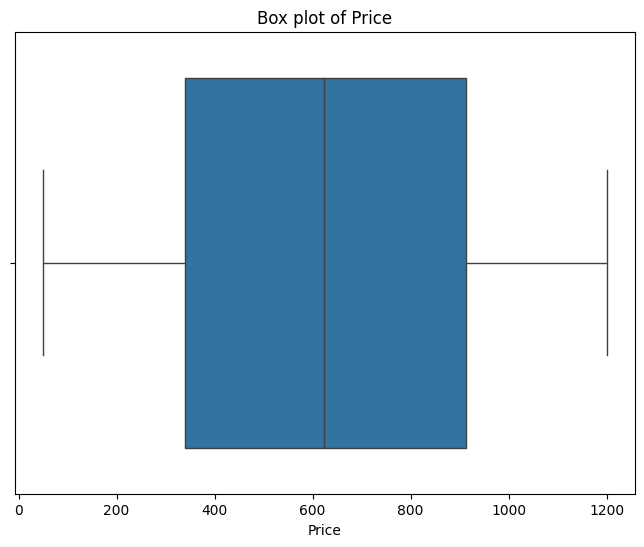


Descriptive statistics for the 'price' column:
count    102352.000000
mean        625.293536
std         331.671614
min          50.000000
25%         340.000000
50%         624.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64


In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Box plot of Price')
plt.xlabel('Price')
plt.show()

print("\nDescriptive statistics for the 'price' column:")
print(df['price'].describe())

### Visualize Listings by Neighbourhood Group

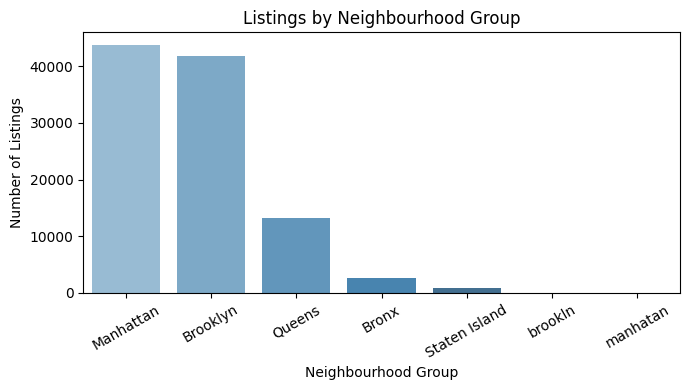

Computed listing counts and average prices, and displayed two plots


In [8]:
plt.figure(figsize=(7,4))
sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='Blues_d', legend=False)
plt.title('Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

print('Computed listing counts and average prices, and displayed two plots')

### Visualize Average Price by Neighbourhood Group

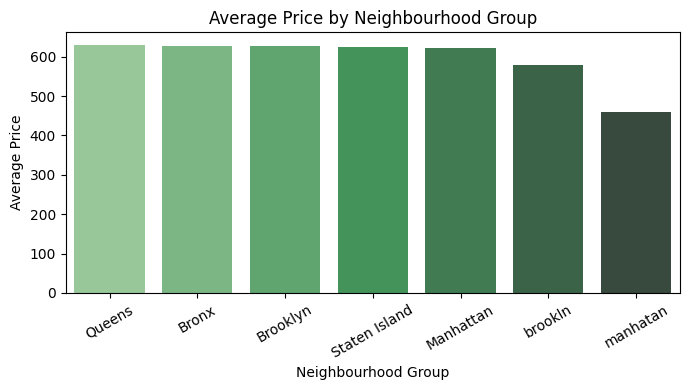

In [9]:
plt.figure(figsize=(7,4))
sns.barplot(x=avg_price.index, y=avg_price.values, hue=avg_price.index, palette='Greens_d', legend=False)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

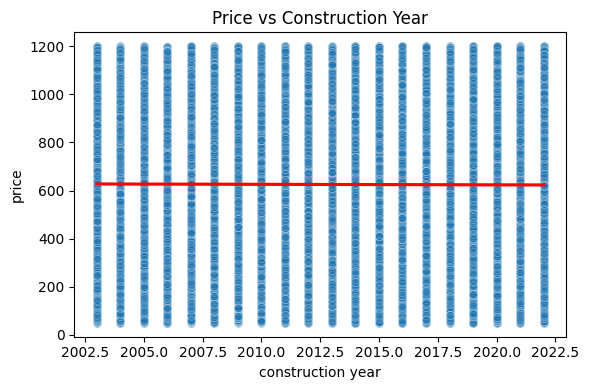

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='construction year', y='price', alpha=0.3)
sns.regplot(data=df, x='construction year', y='price', scatter=False, color='red')
plt.title('Price vs Construction Year')
plt.tight_layout()
plt.show()

### Analyze and Visualize Top 10 Hosts by Listing Count

host name
Blueground      332.0
Sonder (NYC)    327.0
Eugene          218.0
Karen           208.0
Jeniffer        186.0
Soya            171.0
Kaz             161.0
Hiroki          152.0
Momoyo          126.0
Shogo           125.0
Name: calculated host listings count, dtype: float64


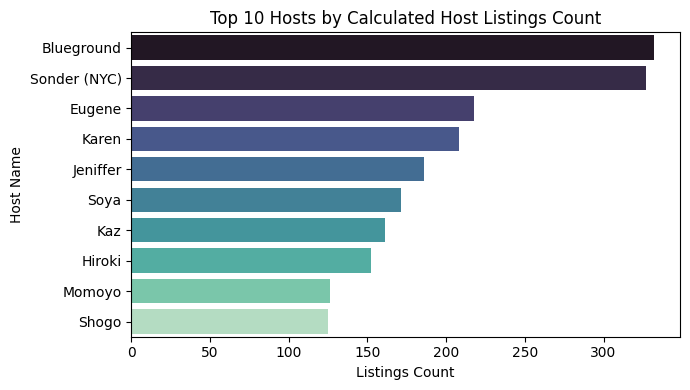

In [11]:
host_counts = df.groupby('host name')['calculated host listings count'].max().sort_values(ascending=False).head(10)
print(host_counts)
plt.figure(figsize=(7,4))
sns.barplot(x=host_counts.values, y=host_counts.index, hue=host_counts.index, palette='mako', legend=False)
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.xlabel('Listings Count')
plt.ylabel('Host Name')
plt.tight_layout()
plt.show()

### Analyze and Visualize Share of Positive Reviews by Host Identity Verification

host_identity_verified
verified       0.457640
unconfirmed    0.452754
Name: positive_review, dtype: float64


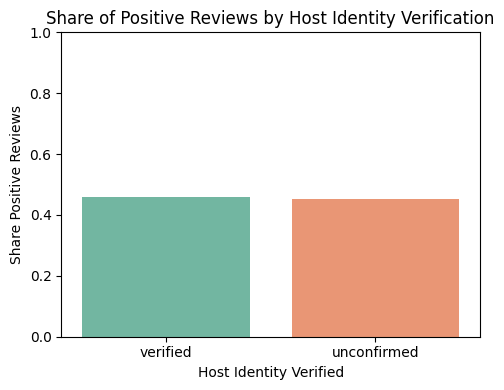

In [12]:
import numpy as np
if 'host_identity_verified' in df.columns:
    df['positive_review'] = np.where(df['review rate number'] >= 4, 1, 0)
    id_rate = df.groupby('host_identity_verified')['positive_review'].mean().sort_values(ascending=False)
    print(id_rate)
    plt.figure(figsize=(5,4))
    sns.barplot(x=id_rate.index.astype(str), y=id_rate.values, hue=id_rate.index.astype(str), palette='Set2', legend=False)
    plt.title('Share of Positive Reviews by Host Identity Verification')
    plt.xlabel('Host Identity Verified')
    plt.ylabel('Share Positive Reviews')
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()

### Analyze and Visualize Service Fee vs Price

0.9999908755543448


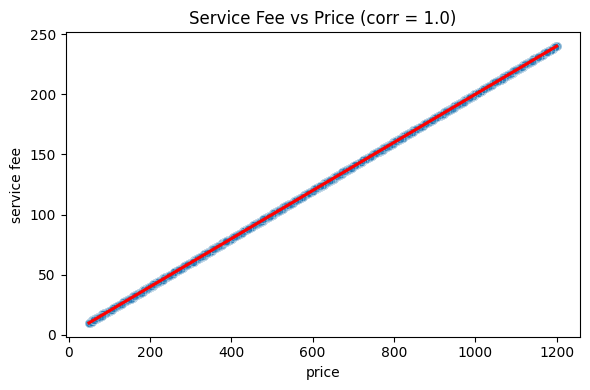

In [13]:
corr_val = df[['price','service fee']].corr().iloc[0,1]
print(corr_val)
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='price', y='service fee', alpha=0.3)
sns.regplot(data=df, x='price', y='service fee', scatter=False, color='red')
plt.title('Service Fee vs Price (corr = ' + str(round(corr_val, 3)) + ')')
plt.tight_layout()
plt.show()

### Analyze and Visualize Average Review Rate by Neighbourhood Group and Room Type

room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                       3.346457         NaN      3.329706     3.264957
Brooklyn                    3.250378        3.75      3.264465     3.336983
Manhattan                   3.275807        3.50      3.277576     3.257459
Queens                      3.349154        3.75      3.315585     3.377778
Staten Island               3.329087         NaN      3.479482     3.533333


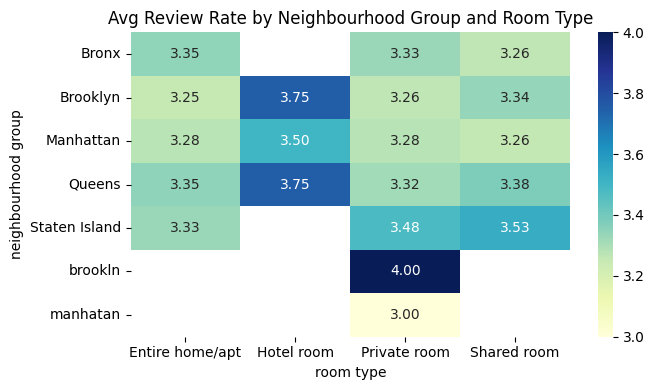

In [14]:
pivot_rt = df.pivot_table(index='neighbourhood group', columns='room type', values='review rate number', aggfunc='mean')
print(pivot_rt.head())
plt.figure(figsize=(7,4))
sns.heatmap(pivot_rt, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Avg Review Rate by Neighbourhood Group and Room Type')
plt.tight_layout()
plt.show()

### Visualize Availability vs Host Listings Count

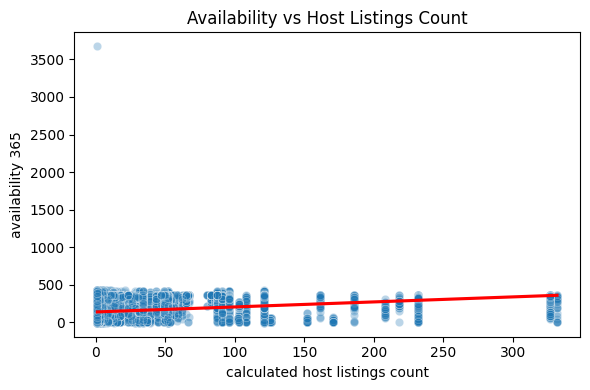

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='calculated host listings count', y='availability 365', alpha=0.3)
sns.regplot(data=df, x='calculated host listings count', y='availability 365', scatter=False, color='red')
plt.title('Availability vs Host Listings Count')
plt.tight_layout()
plt.show()

### Analyze and Visualize Price Distribution by Room Type

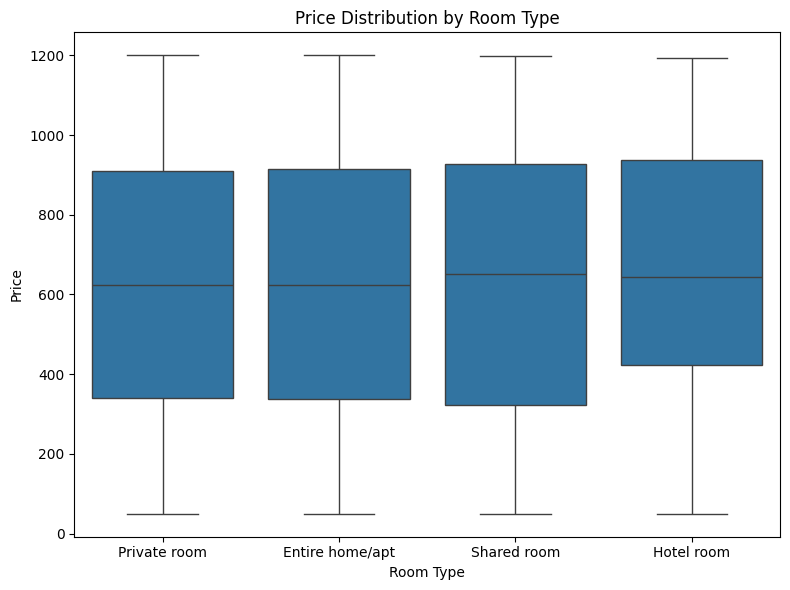

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='room type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()